**House Price Prediction**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import pickle

Load the dataset

In [ ]:
# Load the dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Explore the data
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Sample Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0 

Data Preprocessing

In [ ]:
# Preprocessing
data['MedHouseVal'] = data['MedHouseVal'].clip(upper=5)  # Cap extreme values
scaler = StandardScaler()
features = california.feature_names
data[features] = scaler.fit_transform(data[features])

In [ ]:
# Train-test split
X = data[features]
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


Model Training and Evaluation

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\nRandom Forest Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



Random Forest Performance:
RMSE: 0.5063
R²: 0.8044


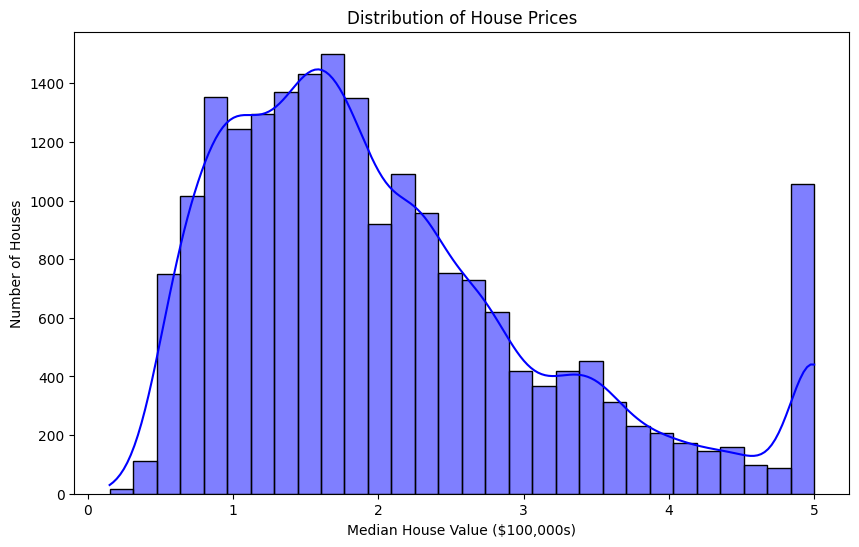

<ipython-input-18-81dfe5f840ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='Greens')


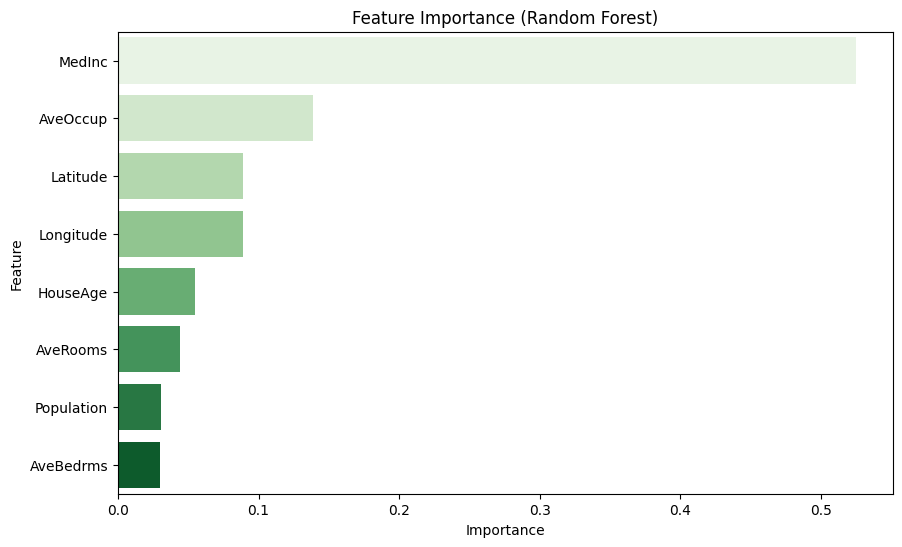

In [ ]:
# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['MedHouseVal'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Number of Houses')
plt.show()

# Visualize feature importance
importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette='Greens')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Interactive prediction with ipywidgets
print("\nEnter Feature Values for Prediction (scaled values, use summary statistics for guidance):")
input_widgets = {}
for feature in features:
    min_val = float(data[feature].min())
    max_val = float(data[feature].max())
    input_widgets[feature] = widgets.FloatSlider(
        value=0.0, min=min_val, max=max_val, step=0.1, description=feature
    )
    display(input_widgets[feature])

predict_button = widgets.Button(description="Predict Price")
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        input_values = [input_widgets[feature].value for feature in features]
        input_scaled = scaler.transform([input_values])  # Scale input
        prediction = rf_model.predict(input_scaled)[0]
        print(f"Predicted House Price: ${prediction*100000:.2f}")

predict_button.on_click(on_predict_button_clicked)
display(predict_button, output)


Enter Feature Values for Prediction (scaled values, use summary statistics for guidance):


FloatSlider(value=0.0, description='MedInc', max=5.858285811780286, min=-1.7742994673175232)

FloatSlider(value=0.0, description='HouseAge', max=1.8561815225324745, min=-2.1961804849268263)

FloatSlider(value=0.0, description='AveRooms', max=55.16323628125675, min=-1.8523185971095077)

FloatSlider(value=0.0, description='AveBedrms', max=69.5717132557033, min=-1.6107677167688605)

FloatSlider(value=0.0, description='Population', max=30.250330218731502, min=-1.2561225469018058)

FloatSlider(value=0.0, description='AveOccup', max=119.41910318829312, min=-0.22899997443511985)

FloatSlider(value=0.0, description='Latitude', max=2.9580676211031918, min=-1.4475679983577021)

FloatSlider(value=0.0, description='Longitude', max=2.625280057018667, min=-2.3859923416733877)

Button(description='Predict Price', style=ButtonStyle())

Output()